In [55]:
import pandas as pd
import numpy as np
import requests

In [56]:
# Summer range: 1946-06-21 to 2020-09-22
# Winter range: 1945-12-21 to 2020-03-20
years = range(1946,2021)
summer_start = '06-21'
summer_end = '09-22'
winter_start = '12-21'
winter_end = '03-20'
summer_dates = []
winter_dates = []
for y in years:
    ss = str(y) + '-' + summer_start
    se = str(y) + '-' + summer_end
    ws = str(y-1) + '-' + winter_start
    we = str(y) + '-' + winter_end
    summer = pd.date_range(ss, se, freq = 'D')
    for s in summer:
        summer_dates.append(str(s.date()))
    winter = pd.date_range(ws, we, freq = 'D')
    for w in winter:
        winter_dates.append(str(w.date()))

In [57]:
col_titles = ["date", "min", "avg", "max"]
test_winter_df = pd.DataFrame(columns=col_titles)
test_summer_df = pd.DataFrame(columns=col_titles)

def getData(df, date):
    """ Takes in a dataframe and the date and inserts the min, avg, and
        max temperatures of that date to the dataframe. """

    url = requests.get("https://www.almanac.com/weather/history/IL/Chicago/" + date)
    content = url.text
    # soup = BeautifulSoup(content, 'html5lib')
    html = pd.read_html(content, header=0)[0]

    html["date"] = date
    data = [html.iloc[0][2], html.iloc[0][1], html.iloc[1][1], html.iloc[2][1]]
    df.loc[len(df)] = data
    

In [59]:
batch = range(0, len(winter_dates), 1000)

for dates in [winter_dates[i : i + 1000] for i in batch]:
    for date in dates:
        getData(winter_df, date)
#winter_df.to_csv("winter_data.csv")

In [72]:
# test_wdf = pd.read_csv('2_winter_data.csv')
# print(len(test_wdf.index))
# # cleaned_wdf = test_wdf[test_wdf['min'].str.contains('No')==False ]
# cleaned_wdf = winter_df[winter_df['max'].str.contains('No')==False]
# # cleaned_wdf = winter_df[winter_df['avg'].str.contains('No')==False ]

# print(len(cleaned_wdf))

,date,min,avg,max
0,12/21/45,-0.9 °F,6.0 °F,12.0 °F
1,12/22/45,1.0 °F,7.4 °F,12.9 °F
2,12/23/45,9.0 °F,19.2 °F,23.0 °F
3,12/24/45,19.9 °F,23.6 °F,30.0 °F
4,12/25/45,27.0 °F,31.8 °F,37.0 °F
...,...,...,...,...
6764,3/16/20,33.1 °F,35.6 °F,39.9 °F
6765,3/17/20,34.0 °F,38.9 °F,41.4 °F
6766,3/18/20,35.1 °F,37.9 °F,42.1 °F
6767,3/19/20,37.0 °F,39.9 °F,44.6 °F


In [ ]:
batch = range(0, len(summer_dates), 500)

for dates in [summer_dates[i : i + 500] for i in batch]:
    for date in dates:
        getData(summer_df, date)       
summer_df.to_csv("summer_data.csv")

In [48]:
winter_df = pd.read_csv('winter_data.csv', index_col=0)
summer_df = pd.read_csv('summer_data.csv', index_col=0)
winter_df

,date,min,avg,max
0,12/21/45,-0.9 °F,6.0 °F,12.0 °F
1,12/22/45,1.0 °F,7.4 °F,12.9 °F
2,12/23/45,9.0 °F,19.2 °F,23.0 °F
3,12/24/45,19.9 °F,23.6 °F,30.0 °F
4,12/25/45,27.0 °F,31.8 °F,37.0 °F
...,...,...,...,...
6764,3/16/20,33.1 °F,35.6 °F,39.9 °F
6765,3/17/20,34.0 °F,38.9 °F,41.4 °F
6766,3/18/20,35.1 °F,37.9 °F,42.1 °F
6767,3/19/20,37.0 °F,39.9 °F,44.6 °F


In [35]:
# Remove ºF from temperature data
def removeUnit(val):
    ''' Removes the unit from the value. Returns value.'''
    new = str(val)
    new = new[ : new.find(' ')]
    return new

winter_df['min'] = winter_df['min'].apply(removeUnit)
winter_df['avg'] = winter_df['avg'].apply(removeUnit)
winter_df['max'] = winter_df['max'].apply(removeUnit)
summer_df['min'] = summer_df['min'].apply(removeUnit)
summer_df['avg'] = summer_df['avg'].apply(removeUnit)
summer_df['max'] = summer_df['max'].apply(removeUnit)

In [47]:
winter_df.head()
# winter_df['year'] = pd.DatetimeIndex(winter_df['date']).year
# summer_df['year'] = pd.DatetimeIndex(summer_df['date']).year

,date,min,avg,max,year
0,12/21/45,-0.9,6.0,12.0,2045
1,12/22/45,1.0,7.4,12.9,2045
2,12/23/45,9.0,19.2,23.0,2045
3,12/24/45,19.9,23.6,30.0,2045
4,12/25/45,27.0,31.8,37.0,2045


In [45]:
winter_df.head()

,date,min,avg,max,year
0,12/21/45,-0.9,6.0,12.0,2045
1,12/22/45,1.0,7.4,12.9,2045
2,12/23/45,9.0,19.2,23.0,2045
3,12/24/45,19.9,23.6,30.0,2045
4,12/25/45,27.0,31.8,37.0,2045


In [40]:
winter_df['min'] = pd.to_numeric(winter_df['min'])
winter_df['avg'] = pd.to_numeric(winter_df['avg'])
winter_df['max'] = pd.to_numeric(winter_df['max'])
summer_df['min'] = pd.to_numeric(summer_df['min'])
summer_df['avg'] = pd.to_numeric(summer_df['avg'])
summer_df['max'] = pd.to_numeric(summer_df['max'])

,date,min,avg,max,year
0,12/21/45,-0.9,6.0,12.0,2045
1,12/22/45,1.0,7.4,12.9,2045
2,12/23/45,9.0,19.2,23.0,2045
3,12/24/45,19.9,23.6,30.0,2045
4,12/25/45,27.0,31.8,37.0,2045


In [41]:
winter_df.groupby(['year'])['min'].describe()
winter_df.groupby(['year'])['avg'].describe()
winter_df.groupby(['year'])['max'].describe()
summer_df.groupby(['year'])['min'].describe()
summer_df.groupby(['year'])['min'].describe()
summer_df.groupby(['year'])['min'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1972,94.0,63.558511,8.583034,45.0,57.900,64.45,69.100,80.1
1973,94.0,70.371277,6.073982,52.0,66.900,70.90,74.800,81.9
1974,94.0,66.205319,7.108716,42.1,62.100,68.00,70.825,80.1
1975,94.0,68.250000,6.584860,50.0,65.175,70.00,73.000,80.1
1976,94.0,66.777660,5.445885,48.9,63.250,66.00,71.100,80.1
...,...,...,...,...,...,...,...,...
2067,94.0,65.254255,4.874482,55.0,61.000,66.00,69.100,75.0
2068,94.0,66.910638,6.280872,55.0,63.000,66.45,71.100,81.0
2069,94.0,67.995745,5.501318,54.0,64.225,70.00,72.000,75.9


<AxesSubplot:xlabel='year'>

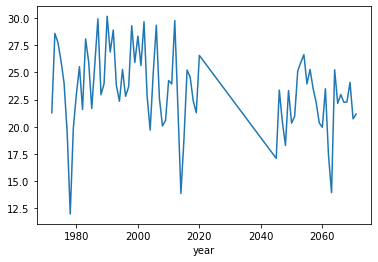

In [44]:
winter_df.groupby(['year'])['min'].mean().plot()
# winter_df.groupby(['year'])['avg'].describe()
# winter_df.groupby(['year'])['max'].describe()
# summer_df.groupby(['year'])['min'].describe()
# summer_df.groupby(['year'])['min'].describe()
# summer_df.groupby(['year'])['min'].describe()

[                                          Temperature           Temperature.1
 0                                 Minimum Temperature                 42.1 °F
 1                                    Mean Temperature                 53.4 °F
 2                                 Maximum Temperature                 68.0 °F
 3                              Pressure and Dew Point  Pressure and Dew Point
 4                             Mean Sea Level Pressure                30.23 IN
 5                                      Mean Dew Point                 35.2 °F
 6                                       Precipitation           Precipitation
 7   Total PrecipitationRain and/or melted snow rep...                 0.00 IN
 8                                          Visibility                 84.2 MI
 9   Snow DepthLast report for the day if reported ...                No data.
 10                               Wind Speed and Gusts    Wind Speed and Gusts
 11                                    Mean Wind Spe

In [53]:


# for date in summer_dates[:10]:
#     getData(test_winter_df, date)
# test_winter_df.to_csv("test_summer_data.csv")

# tw_df = pd.read_csv("test_summer_data.csv")
# tw_df['year'] = pd.DatetimeIndex(tw_df['date']).year
# tw_df.head()



# Remove ºF from temperature data
def removeUnit(val):
    ''' Removes the unit from the value. Returns value.'''
    new = str(val)
    new = new[ : new.find(' ')]
    return new

winter_df['min'] = winter_df['min'].apply(removeUnit)
winter_df['avg'] = winter_df['avg'].apply(removeUnit)
winter_df['max'] = winter_df['max'].apply(removeUnit)
summer_df['min'] = summer_df['min'].apply(removeUnit)
summer_df['avg'] = summer_df['avg'].apply(removeUnit)
summer_df['max'] = summer_df['max'].apply(removeUnit)



,Unnamed: 0,date,min,avg,max,year
0,0,1946-06-21,50.0 °F,58.6 °F,66.9 °F,1946
1,1,1946-06-22,54.0 °F,67.5 °F,84.0 °F,1946
2,2,1946-06-23,64.9 °F,76.9 °F,89.1 °F,1946
3,3,1946-06-24,66.0 °F,77.9 °F,89.1 °F,1946
4,4,1946-06-25,70.0 °F,76.8 °F,86.0 °F,1946
